# Computer Science 361: Machine Learning
## Assignment 3
**Members:** Ted Lo, Tony Lin, Arshdeep Singh, Olive Huang, William Lee, Andriel Pernecita  
**Topic:** Investigation of Different Supervised Learning Algorithms for BBC News Article Classification
___

## Task One: Data Processing
### Exploratory Data Analytics
The first step towards analyzing different supervised learning algorithms on a given dataset is to process the data we are provided. The following code imports the csv files as dataframes. We then process the generated dataframes so that sklearn can work with the data.
___

In [1]:
# Importing Numpy and Pandas as we will most likely be using both modules
import numpy as np 
import pandas as pd

# Importing Matplotlib to display our analytics.
import matplotlib.pyplot as plt

# Importing various sklearn submodules for use as required throughout the assignment.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import svm

# Reading both train.csv and test.csv into data and test_data respectively.
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [2]:
label_encoder = LabelEncoder()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.Text)
df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_no_text = data.drop("Text",axis=1)
df_no_text["Category"] = label_encoder.fit_transform(df_no_text["Category"])
x_train = pd.concat([df_no_text,df],axis=1)
#0 - entertainment 1 - tech
x_train

,ArticleId,Category,00,000,000th,001st,0051,007,0100,0130,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,1976,1,0.0,0.020115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1797,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1866,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1153,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,342,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054551,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1388,0,0.0,0.090352,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
424,1917,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
425,1122,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
426,2166,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [3]:
label_encoder = LabelEncoder()
vectorizer = TfidfVectorizer()
X_test = vectorizer.fit_transform(test_data.Text)
df = pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names_out())
df_no_text = test_data.drop("Text",axis=1)
df_no_text["Category"] = label_encoder.fit_transform(df_no_text["Category"])
x_test = pd.concat([df_no_text,df],axis=1)
#0 - entertainment 1 - tech
x_test

,ArticleId,Category,000,000th,0400,05,06,0800,0845,0870,...,zen,zens,zeppelin,zeta,zhang,zip,ziyi,zoe,zombie,zutons
0,1821,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,522,1,0.026422,0.0,0.0,0.0,0.0,0.0,0.0,0.053617,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,636,1,0.025049,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,170,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.063156,0.0,0.063156,0.0,0.0,0.0
4,85,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1904,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
102,857,0,0.038655,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
103,325,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
104,1587,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.101571,0.055287,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


___
### Part A

In [4]:
# Print out number of articles.
num_articles = len(x_test.index) + len(x_train.index)
print("There are {articles} articles in the entire dataset".format(articles=num_articles))

There are 534 articles in the entire dataset


In [5]:
# Print out number of extracted features.
num_features = len(x_train.columns)
print("There are {features} features extracted in the training dataset".format(features=num_features))

There are 13520 features extracted in the training dataset


In [6]:
# Print out 5 articles with extracted features.
x_train.head()

,ArticleId,Category,00,000,000th,001st,0051,007,0100,0130,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,1976,1,0.0,0.020115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1797,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1866,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1153,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,342,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054551,0.0


___
### Part B

In [7]:
# Vectorizing data.
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data.Text)
df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
label_encoder = LabelEncoder()
df_no_text = data.drop("Text",axis=1)
df_no_text["Category"] = label_encoder.fit_transform(df_no_text["Category"])
x_train = pd.concat([df_no_text,df],axis=1)
x_train

,ArticleId,Category,00,000,000th,001st,0051,007,0100,0130,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,1976,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1797,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1866,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,342,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1388,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,1917,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,1122,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,2166,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


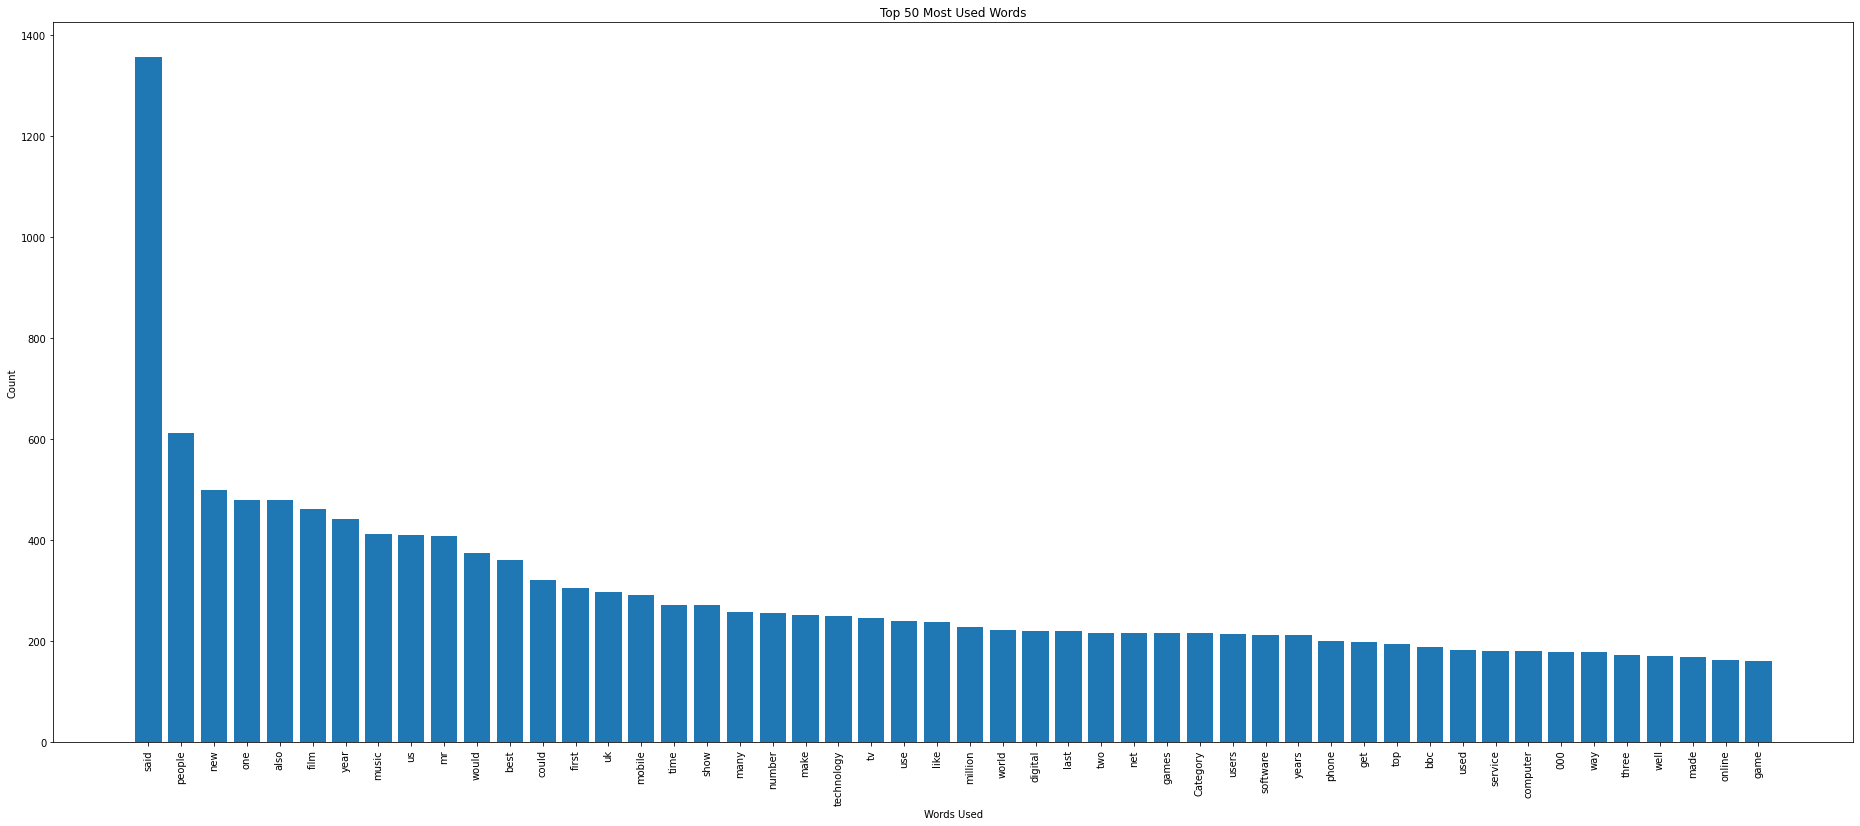

In [8]:
# Plotting the top-50 term frequency distribution graph of entire dataset.
feature_names = list(x_train.columns)

feature_sum = {}
for name in feature_names:
    feature_sum[name] = x_train[name].sum()
    
ordered_feature_sum = {k: v for k, v in sorted(feature_sum.items(), key=lambda item: item[1])}
keys = list(ordered_feature_sum.keys())
#start from 2 because the largest will be article ID as it is not in count form as it is unique
frequency_data = []
frequency_word = []
for i in range(2,52):
    frequency_data.append(ordered_feature_sum[keys[-i]])
    frequency_word.append(keys[-i])
    
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Top 50 Most Used Words")
ax.set_xlabel('Words Used')
ax.set_ylabel('Count')
ax.bar(frequency_word,frequency_data)
plt.xticks(rotation=90)
plt.show()

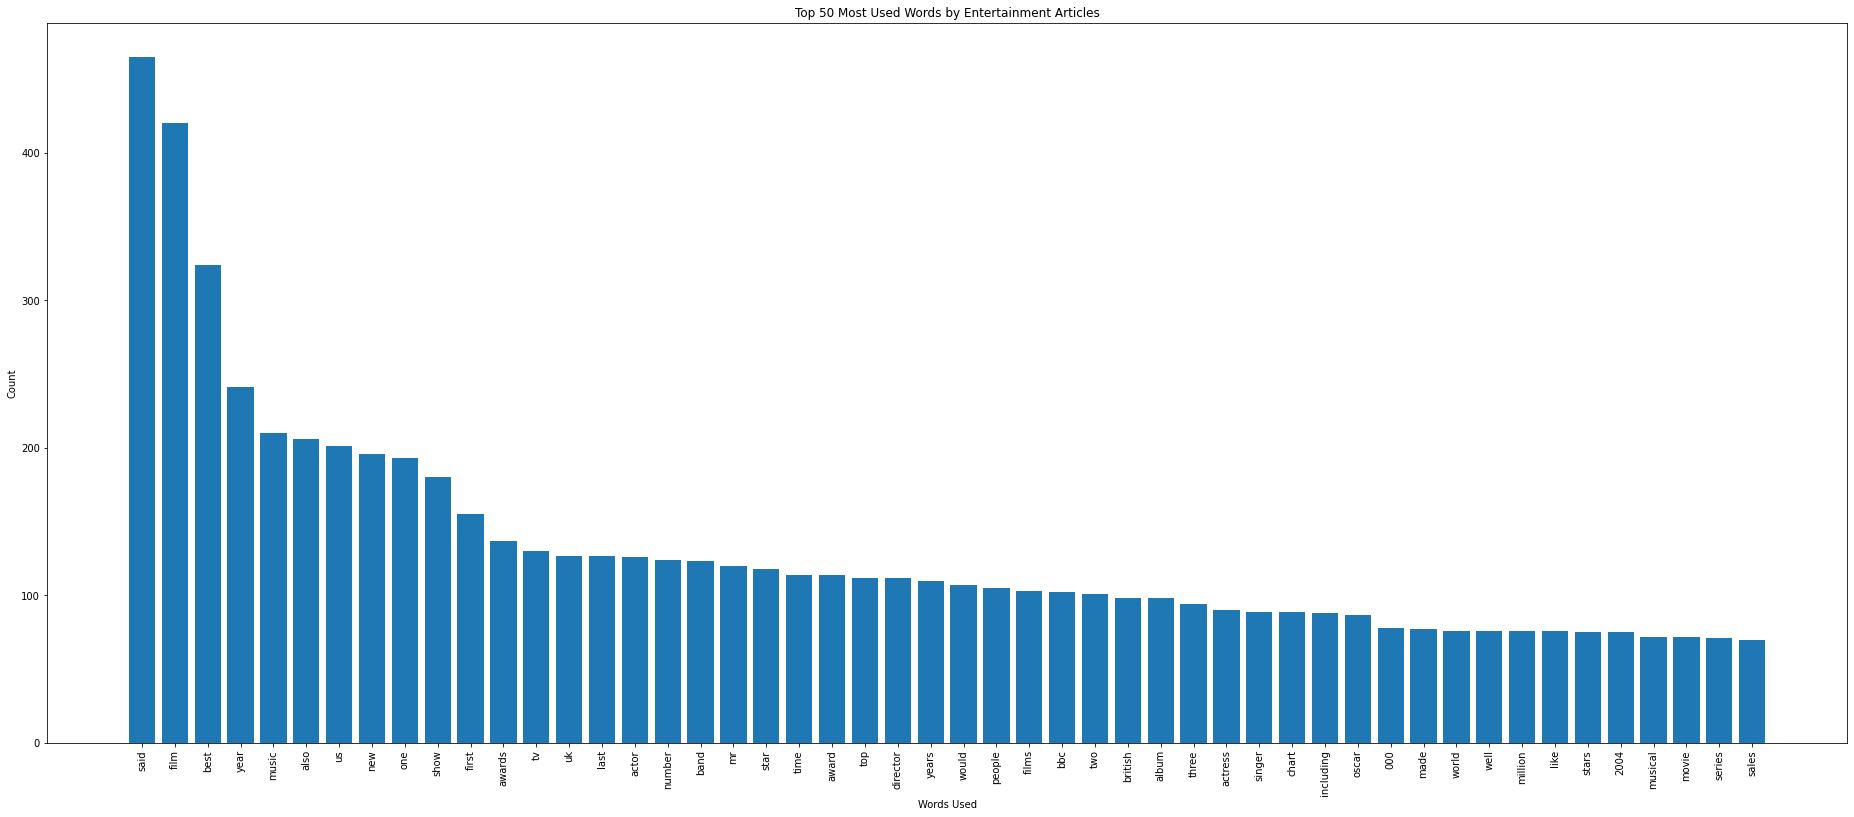

In [9]:
# Plotting the term frequency distribution for respective classes of articles.

# For entertainment articles.
entertainment_feature_sum = {}
entertainment_sum = x_train.loc[x_train["Category"].eq(0)]
for name in entertainment_sum:
    entertainment_feature_sum[name] = entertainment_sum[name].sum()
    
ordered_eFeature_sum = {k: v for k, v in sorted(entertainment_feature_sum.items(), key=lambda item: item[1])}
ekeys = list(ordered_eFeature_sum.keys())
#start from 2 because the largest will be article ID as it is not in count form as it is unique
eFrequency_data = []
eFrequency_word = []
for i in range(2,52):
    eFrequency_data.append(ordered_eFeature_sum[ekeys[-i]])
    eFrequency_word.append(ekeys[-i])
    
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Top 50 Most Used Words by Entertainment Articles")
ax.set_xlabel('Words Used')
ax.set_ylabel('Count')
ax.bar(eFrequency_word,eFrequency_data)
plt.xticks(rotation=90)
plt.show()

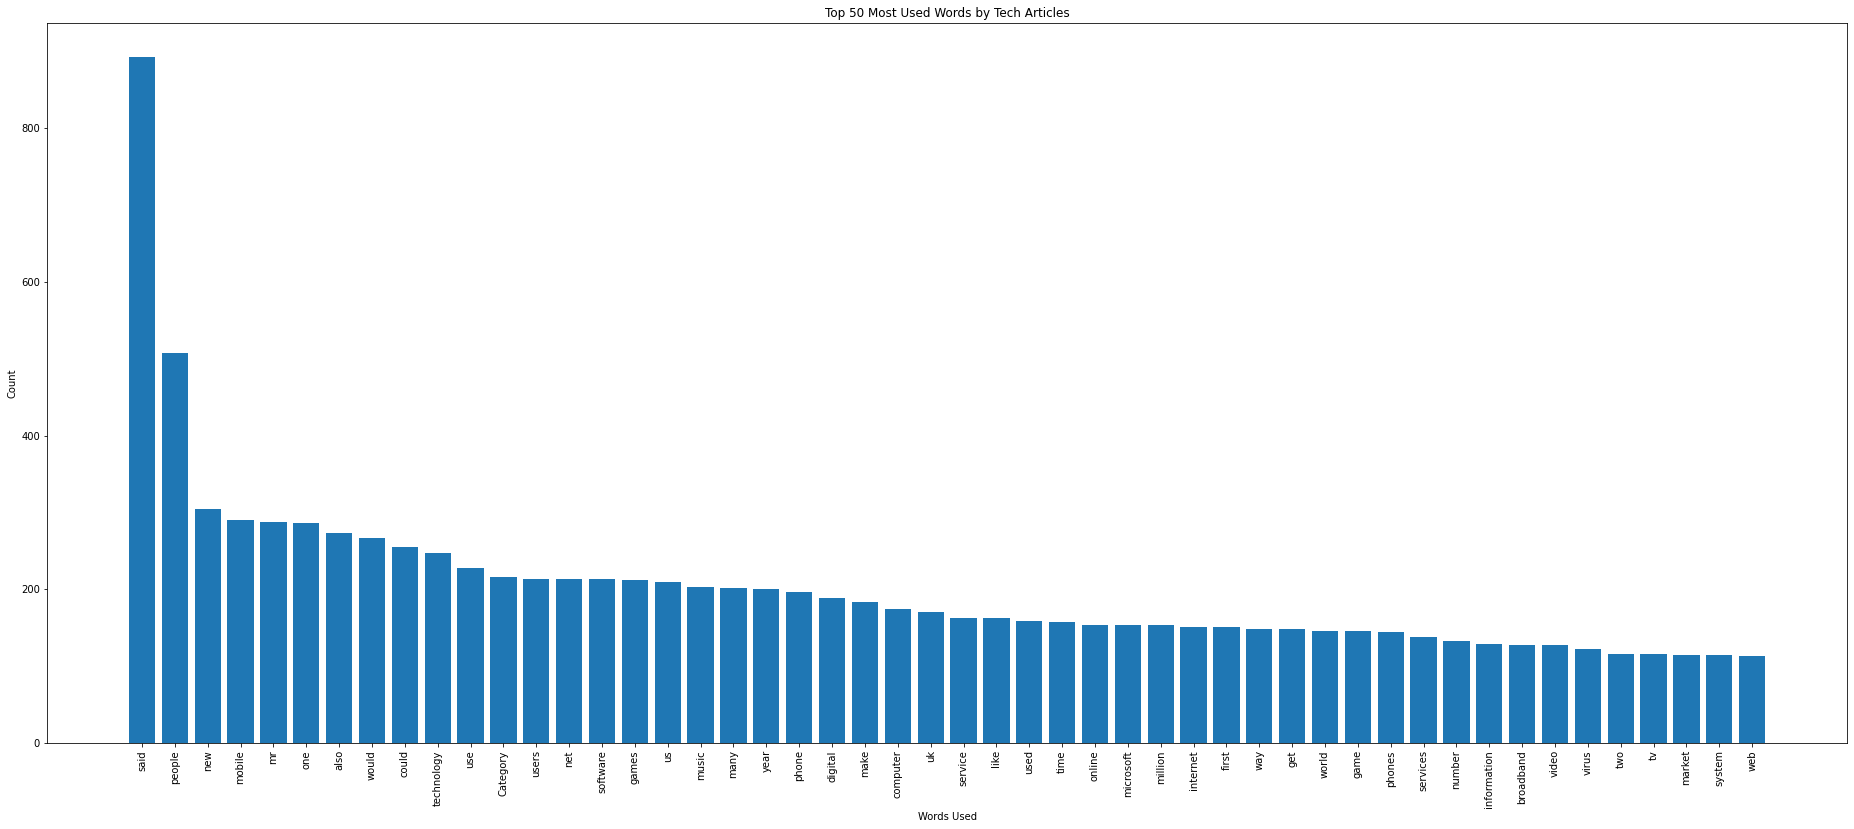

In [10]:
# For tech articles.
tech_feature_sum = {}
tech_sum = x_train.loc[x_train["Category"].eq(1)]
for name in tech_sum:
    tech_feature_sum[name] = tech_sum[name].sum()
    
ordered_tFeature_sum = {k: v for k, v in sorted(tech_feature_sum.items(), key=lambda item: item[1])}
tkeys = list(ordered_tFeature_sum.keys())
#start from 2 because the largest will be article ID as it is not in count form as it is unique
tFrequency_data = []
tFrequency_word = []
for i in range(2,52):
    tFrequency_data.append(ordered_tFeature_sum[tkeys[-i]])
    tFrequency_word.append(tkeys[-i])
    
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Top 50 Most Used Words by Tech Articles")
ax.set_xlabel('Words Used')
ax.set_ylabel('Count')
ax.bar(tFrequency_word,tFrequency_data)
plt.xticks(rotation=90)
plt.show()

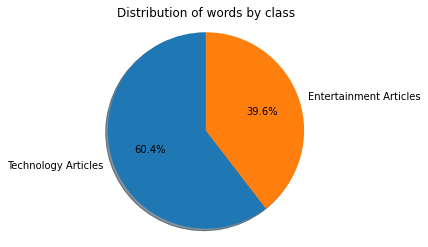

In [11]:
# Plots the distribution of words by class as a pie chart.
classDistribution = [sum(tFrequency_data),sum(eFrequency_data)]
classLabels = ["Technology Articles","Entertainment Articles"]
fig1, ax1 = plt.subplots()
ax1.pie(classDistribution,labels=classLabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of words by class")
plt.show()

In [12]:
combined = pd.concat([data,test_data])
combined = combined.reset_index(drop=True)

label_encoder = LabelEncoder()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(combined.Text)
df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_no_text = combined.drop("Text",axis=1)
df_no_text["Category"] = label_encoder.fit_transform(df_no_text["Category"])
x = pd.concat([df_no_text,df],axis=1)
#0 - entertainment 1 - tech
#train data is row from 0 - 427
#test data is from row 428 - 534
y = x.Category
x = x.drop(["Category","ArticleId"],axis=1)

x_train = x.loc[0:427]
y_train = y.loc[0:427]

x_test = x.loc[428:]
y_test = y.loc[428:]

___
## Task Two: Machine Learning
The following task contains each of our classification model's results.
___
### Part A: Logistic Regression

___
### Part B: Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred_class = nb.predict(x_test)

# Note that 0 = Entertainment and 1 = Tech as in Task One.
print(nb.classes_)
print(nb.feature_log_prob_)

[0 1]
[[-9.73906024 -8.56656675 -9.57316639 ... -9.68435104 -9.62582327
  -9.73906024]
 [-9.69733678 -8.58373898 -9.753221   ... -9.753221   -9.753221
  -9.753221  ]]


In [14]:
features = nb.feature_names_in_
feature_prob0 = nb.feature_log_prob_[0]
feature_prob1 = nb.feature_log_prob_[1]

sorting_indices = np.argsort(feature_prob0)
sorted_features = features[sorting_indices]
sorted_prob = feature_prob0[sorting_indices]
sorted_set1 = sorted_features[::-1][0:20]  #top20 by descending order
print("Top 20 words that are most likely to occur in entertainment news articles:")
print(sorted_set1)
print()
sorting_indices = np.argsort(feature_prob1)
sorted_features = features[sorting_indices]
sorted_prob = feature_prob1[sorting_indices]
sorted_set2 = sorted_features[::-1][0:20]  #top20 by descending order
print("Top 20 words that are most likely to occur in tech news articles:")
print(sorted_set2)

Top 20 words that are most likely to occur in entertainment news articles:
['film' 'best' 'said' 'show' 'music' 'band' 'year' 'awards' 'us' 'award'
 'actor' 'album' 'star' 'tv' 'chart' 'number' 'also' 'new' 'oscar' 'top']

Top 20 words that are most likely to occur in tech news articles:
['said' 'people' 'mobile' 'games' 'software' 'phone' 'net' 'users'
 'technology' 'mr' 'microsoft' 'computer' 'broadband' 'virus' 'use' 'new'
 'game' 'could' 'digital' 'service']


The above result shows the words that are most likely to occur for each article class. However, due to the lack of constraint, our results show several generic words. "Said" is in the top 3 words for both classes. Other generic words found in the dataset include "people", "also", and "new". These tell us very little about the true nature of the classes of articles. Next, we explore the changes when we implement constraint.

In [15]:
# Maximixing Constraint
feature_prob = []
for i in range(len(features)):
    feature_prob.append(feature_prob0[i] - feature_prob1[i])
feature_prob_array = np.asarray(feature_prob)
sorting_indices = np.argsort(feature_prob_array)
sorted_features = features[sorting_indices]
sorted_prob = feature_prob_array[sorting_indices]
sorted_set1 = sorted_features[::-1][0:20]
print("Top 20 words that are most likely to occur in entertainment news articles while maximising constraint:")
print(sorted_set1)
print()
feature_prob.clear()
for i in range(len(features)):
    feature_prob.append(feature_prob1[i] - feature_prob0[i])
feature_prob_array = np.asarray(feature_prob)
sorting_indices = np.argsort(feature_prob_array)
sorted_features = features[sorting_indices]
sorted_prob = feature_prob_array[sorting_indices]
sorted_set2 = sorted_features[::-1][0:20]
print("Top 20 words that are most likely to occur in tech news articles while maximising constraint:")
print(sorted_set2)

Top 20 words that are most likely to occur in entertainment news articles while maximising constraint:
['film' 'band' 'best' 'actor' 'album' 'chart' 'oscar' 'singer' 'award'
 'actress' 'musical' 'star' 'stars' 'comedy' 'awards' 'festival' 'aviator'
 'theatre' 'nominated' 'rock']

Top 20 words that are most likely to occur in tech news articles while maximising constraint:
['mobile' 'software' 'users' 'games' 'microsoft' 'net' 'technology'
 'broadband' 'virus' 'phone' 'computer' 'phones' 'spam' 'mail' 'firms'
 'spyware' 'use' 'online' 'services' 'internet']


By maximising the constraint, we can see that each top 20 list contain words that are more specific/ related to their corresponding news article category. This makes sense as the constraint gives us the probability of seeing a word in one type of news article compared to another type, which in turn generated top 20 words that have more chance of appearing in one news article type over the other.

This can be compared to the top 20 words lists generated initally that contain words that are more general and have broader usage in english sentences (Not category specific).

Hence, we can say that the top 20 words list generated with the constraint in place describes the two classes better.

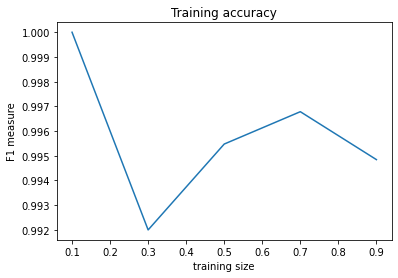

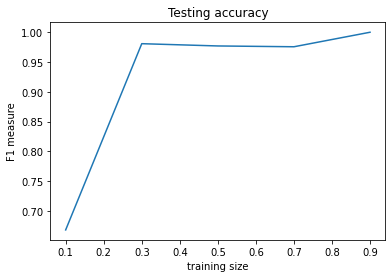

In [16]:
# Plotting training and testing accuracy of NB.
# For Task Three I believe?
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

m = [0.1, 0.3, 0.5, 0.7, 0.9]
train_accuracy = []
test_accuracy = []
for num in m:
    train_portion = num*len(x_train)
    training_x = x_train.loc[0:train_portion]
    training_y = y_train.loc[0:train_portion]
    testing_x = x_train.loc[train_portion:]
    testing_y = y_train.loc[train_portion:]
    nb = MultinomialNB()
    nb.fit(training_x, training_y)
    y_train_pred = nb.predict(training_x)
    y_test_pred = nb.predict(testing_x)
    train_accuracy.append(f1_score(training_y, y_train_pred))
    test_accuracy.append(f1_score(testing_y, y_test_pred))
    
plt.plot(m, train_accuracy)
plt.xlabel("training size")
plt.ylabel("F1 measure")
plt.title("Training accuracy")
plt.show()

plt.plot(m, test_accuracy)
plt.xlabel("training size")
plt.ylabel("F1 measure")
plt.title("Testing accuracy")
plt.show()

___
### Part C: Support Vector Machine
#### Data Processing

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, ax, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightblue', 'orange', 'lightgreen', 'gray', 'cyan')
    background = ('lightcyan', 'papayawhip')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            ax.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            ax.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   
    ax.set_xlabel('Primary Component 0', size=16)
    ax.set_ylabel('Primary Component 1', size=16)
    ax.legend(loc='upper left')

In [18]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.colors import ListedColormap

In [19]:
from sklearn.decomposition import PCA

#------------------------------------------------------
pca = PCA()
pca.n_components = 2
principalComponents = pca.fit_transform(x_train)

#### Soft Margin SVM

[Text(0.5, 0, 'Principal Component'),
 Text(0, 0.5, 'explained_variance_in_ratio'),
 Text(0.5, 1.0, 'Explained-variance vs Component Chart')]

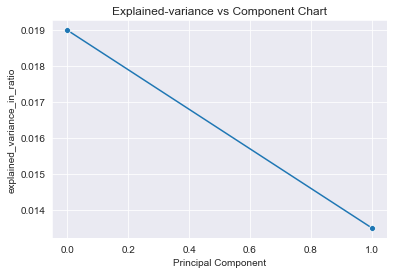

In [20]:
explained_var_ratio = pca.explained_variance_ratio_ #The explained variance for each principal component

#Plotting
sns.set_style('darkgrid')
ax = sns.lineplot(x=range(len(explained_var_ratio)),y=explained_var_ratio,marker='o')
ax.set(xlabel='Principal Component',ylabel='explained_variance_in_ratio',title='Explained-variance vs Component Chart')

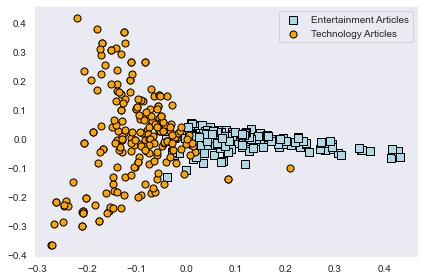

In [21]:
plt.scatter(principalComponents[y_train == 0, 0],
            principalComponents[y_train == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='Entertainment Articles')

plt.scatter(principalComponents[y_train == 1, 0],
            principalComponents[y_train == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Technology Articles')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [22]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # plot the decision surface
    colors = ('lightblue', 'orange', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:2])
    x1_min, x1_max = xlim[0] - 1, xlim[1] + 1
    x2_min, x2_max = ylim[0] - 1, ylim[1] + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)    
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=0.1, edgecolor='black', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Training accuracy of: 0.9602803738317757


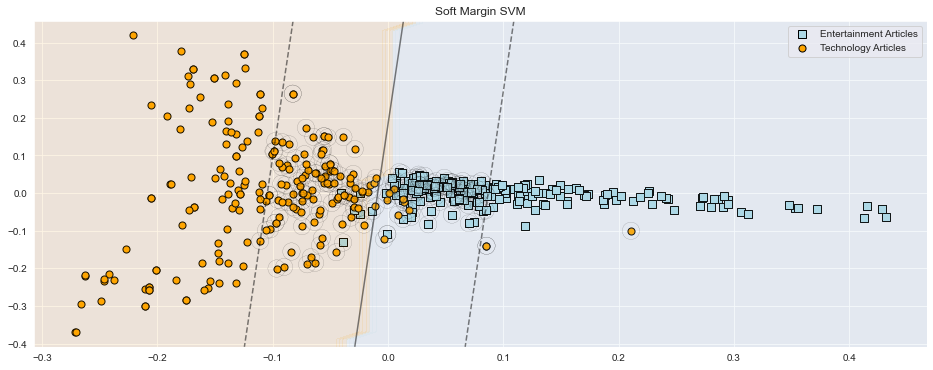

In [23]:
svcl = svm.SVC(kernel="linear")
svcl.fit(principalComponents, y_train)
plt.figure(figsize=(16,6))
plt.scatter(principalComponents[y_train == 0, 0],
            principalComponents[y_train == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='Entertainment Articles')

plt.scatter(principalComponents[y_train == 1, 0],
            principalComponents[y_train == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Technology Articles')

plt.legend(scatterpoints=1)
plt.title("Soft Margin SVM")
plot_svc_decision_function(svcl);

plt.savefig('SoftSVMLowPenalty.pdf', format='pdf')
print("Training accuracy of: {}".format(svcl.score(principalComponents,y_train)))

Training accuracy of: 0.9579439252336449


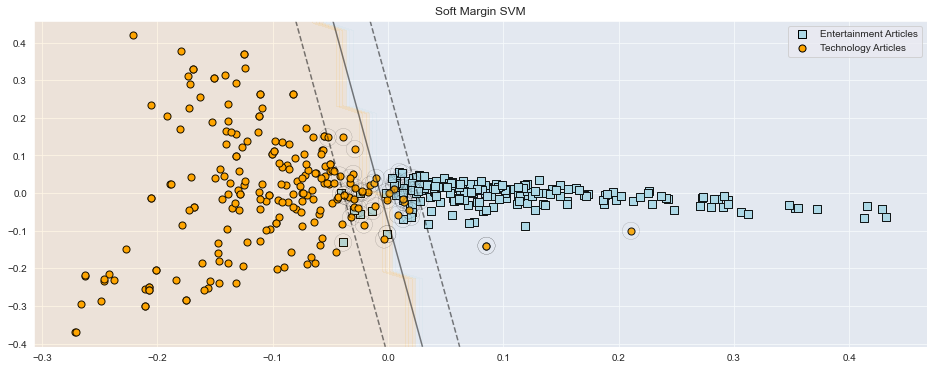

In [24]:
svcl = svm.SVC(kernel="linear",C=100)
svcl.fit(principalComponents, y_train)
plt.figure(figsize=(16,6))
plt.scatter(principalComponents[y_train == 0, 0],
            principalComponents[y_train == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='Entertainment Articles')

plt.scatter(principalComponents[y_train == 1, 0],
            principalComponents[y_train == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Technology Articles')

plt.legend(scatterpoints=1)
plt.title("Soft Margin SVM")
plot_svc_decision_function(svcl);

plt.savefig('SoftSVMHighPenalty.pdf', format='pdf')
print("Training accuracy of: {}".format(svcl.score(principalComponents,y_train)))

#### Hard Margin SVM w/ RBF Kernel

In [25]:

# X, y = make_blobs(n_samples=100, centers=2,
#                   random_state=0, cluster_std=0.8)
model_rbf = svm.SVC(kernel='rbf', C=1E10).fit(principalComponents, y_train)

Training accuracy of: 0.9579439252336449


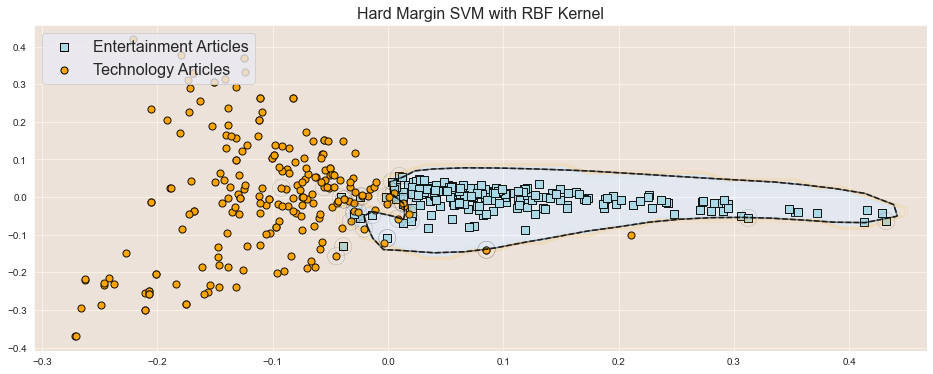

In [26]:
fig = plt.figure(figsize=(16,6))
ax = fig.axes
plt.scatter(principalComponents[y_train == 0, 0],
        principalComponents[y_train == 0, 1],
        s=50, c='lightblue',
        marker='s', edgecolor='black',
        label='Entertainment Articles')
plt.scatter(principalComponents[y_train == 1, 0],
            principalComponents[y_train == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Technology Articles')

plot_svc_decision_function(model_rbf)
plt.scatter(model_rbf.support_vectors_[:, 0],
            model_rbf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

plt.title('Hard Margin SVM with RBF Kernel', size=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('HardSVMRBFKernel.pdf', format='pdf')
print("Training accuracy of: {}".format(model_rbf.score(principalComponents,y_train)))

#### Hard Margin SVM w/ Sigmoid Kernel

Training accuracy of: 0.9158878504672897


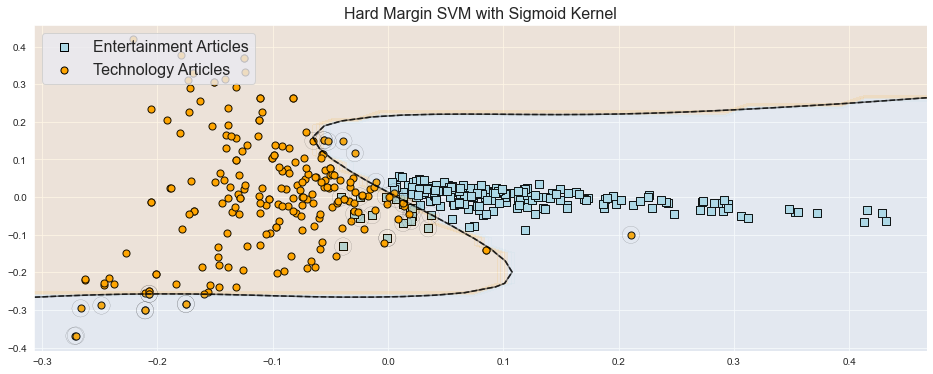

In [27]:
model_sig= svm.SVC(kernel='sigmoid', C=1E10).fit(principalComponents, y_train)
fig = plt.figure(figsize=(16,6))
ax = fig.axes
plt.scatter(principalComponents[y_train == 0, 0],
        principalComponents[y_train == 0, 1],
        s=50, c='lightblue',
        marker='s', edgecolor='black',
        label='Entertainment Articles')
plt.scatter(principalComponents[y_train == 1, 0],
            principalComponents[y_train == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Technology Articles')

plot_svc_decision_function(model_sig)
plt.scatter(model_sig.support_vectors_[:, 0],
            model_sig.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

plt.title('Hard Margin SVM with Sigmoid Kernel', size=16)
plt.legend(loc='upper left', fontsize=16)
plt.savefig('HardSVMSigmoidKernel.pdf', format='pdf')
print("Training accuracy of: {}".format(model_sig.score(principalComponents,y_train)))

___
### Part D: Neural Network

___

## Task Three: Evaluation

___
### Part A: Training Dataset Size

___
### Part B: 5-Fold Cross-Validation

___
### Part C: Results Analysis

___